# Asymmetric Asset Exchange Game

Asset exchange games are models of gas particle collisions applied to conservative monetary (income/wealth) systems. Pairs of agents are chosen randomly to exchange assets (e.g. service for money), analogous to energy exchange after particle collisions. Suppose $m_i(t)$ is the amount of money agent $i$ has at time t.
\begin{equation}
\begin{split}
    m_i(t+1) &= m_i(t) - \Delta m \\
    m_j(t+1) &= m_j(t) + \Delta m.
\end{split}
\end{equation}

It is known from statistical physics that the stationary state $P(m)$ of money follows the Boltzmann-Gibbs distribution, which is the bulk of many observed income distributions but not the tail. Many relaxations of this game have been proposed to try to reproduce the power-law tail. Here we implement one of them and combine it with another with networks.

The version of the model without network is an implementation of the model in Sinha (2005), while the version with networks is adapted from Gusman et al. (2005).

### References

Sinha, S., 2005. The rich are different! Pareto law from asymmetric interactions in asset exchange models. In Econophysics of Wealth Distributions (pp. 177-183). Springer, Milano.

Gusman, S.R., Laguna, M.F. and Iglesias, J.R., 2005. Wealth distribution in a network with correlations between links and success. In Econophysics of Wealth Distributions (pp. 149-158). Springer, Milano.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
from model import AsymmetricAssetExchangeModel
import seaborn as sns
import networkx as nx
import pickle
import utils
%load_ext autoreload
%autoreload 2

In [20]:
N=10000
w0 = [random.uniform(10,500) for _ in range(N)]
tau = [random.random() for _ in range(N)]

In [125]:
model = AsymmetricAssetExchangeModel(N, w0, tau, network=True, k=15, seed=54343549)
model.run(10000000)

In [126]:
wealth = model.get_all_wealth()
#wealth.sort()

## Wealth distribution

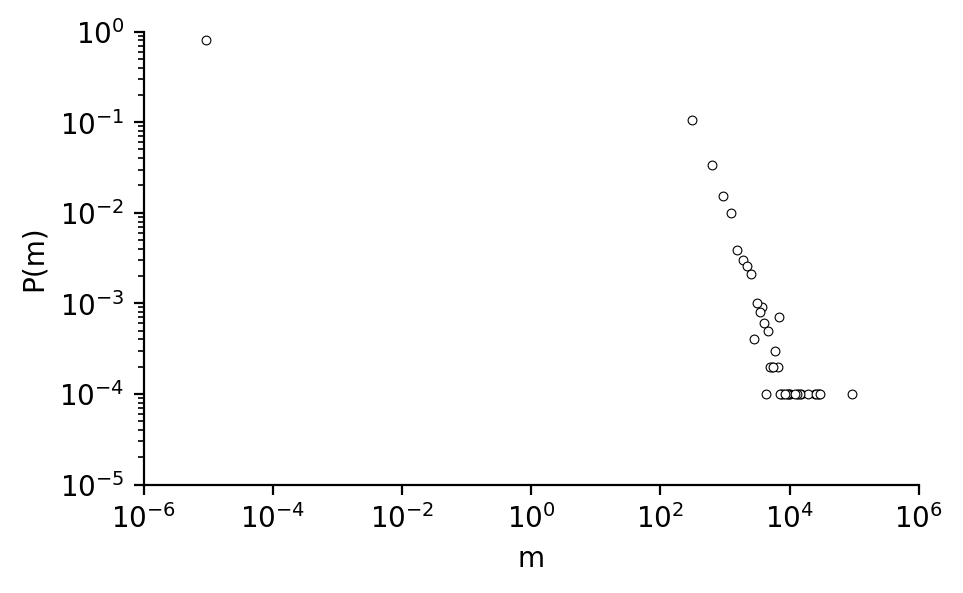

In [162]:
fig, ax = utils.plot_dis(wealth, kind='pdf', bins=300)
ax.set_xlim(0.000001,1000000)
ax.set_ylim(0.00001,1)
ax.set_ylabel("P(m)")
ax.set_xlabel("m")
plt.show()

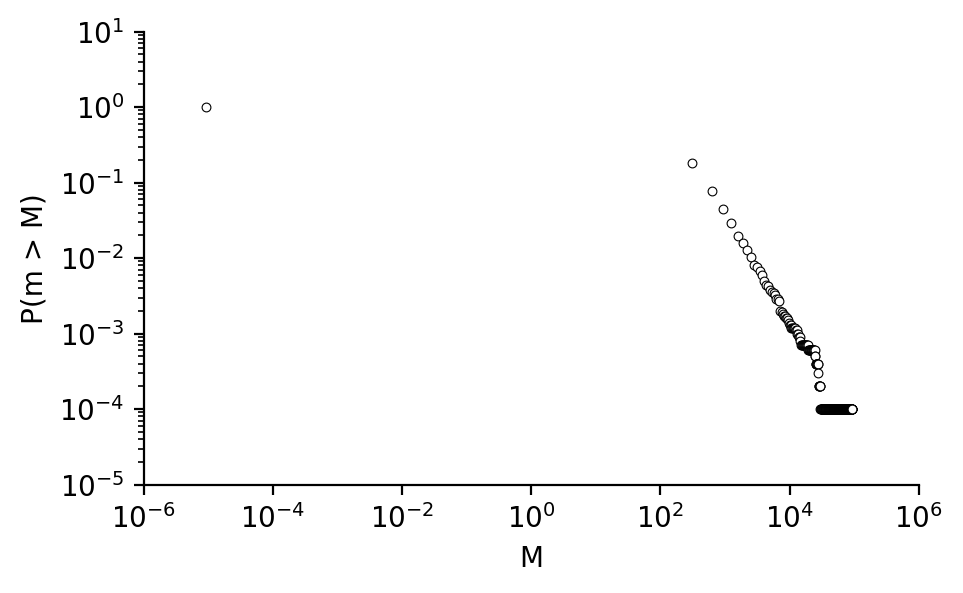

In [163]:
fig, ax = utils.plot_dis(wealth, kind='cdf', bins=300)
ax.set_xlim(0.000001,1000000)
ax.set_ylim(0.00001,10)
ax.set_ylabel("P(m > M)")
ax.set_xlabel("M")
plt.show()

## Degree distribution at t=0 and t=10e6

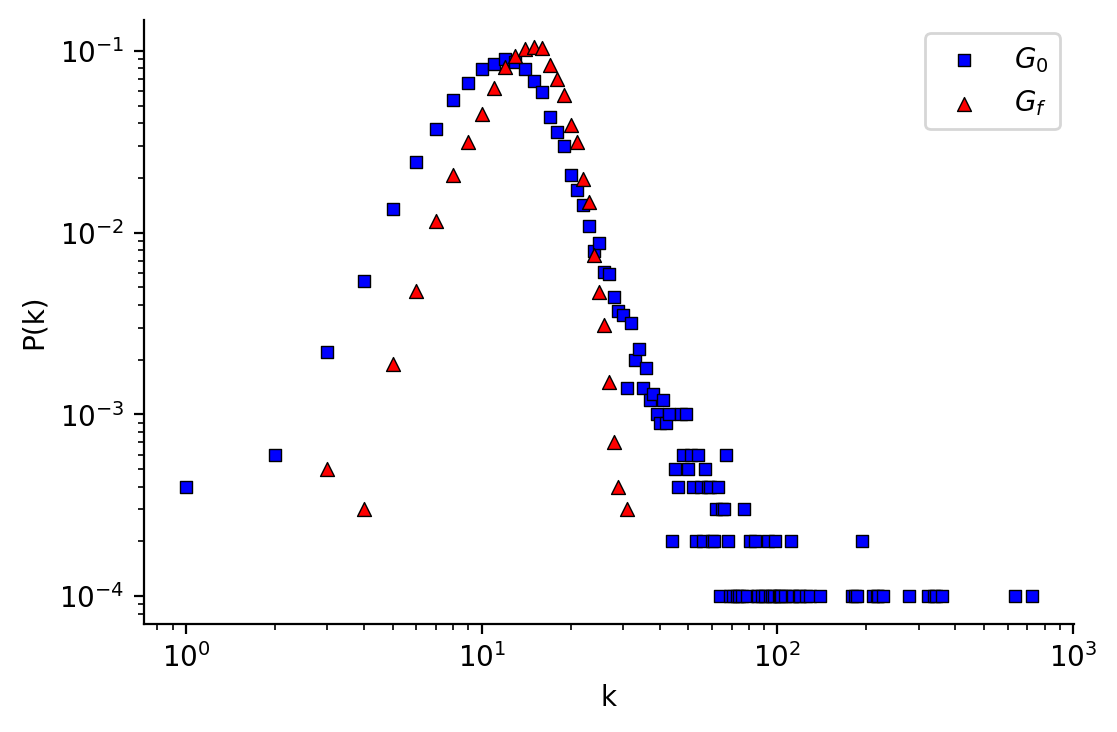

In [164]:
k_hist = model.get_degree_histogram()
k_sum = sum(k_hist.values())
keys = sorted(k_hist.keys())
k_hist = {k:k_hist[k]/k_sum for k in keys}

k0 = [model.G0.degree(i) for i in range(N)]
k0_hist = utils.discrete_histogram(k0)
k_sum = sum(k0_hist.values())
keys = sorted(k0_hist.keys())
k0_hist = {k:k0_hist[k]/k_sum for k in keys}

plt.figure(dpi=200)
plt.scatter(k_hist.keys(), k_hist.values(), color='blue', edgecolors='black', linewidths=0.5, s=20, marker='s', label=r'$G_0$')
plt.scatter(k0_hist.keys(), k0_hist.values(), color='red', edgecolors='black', linewidths=0.5, s=25, marker='^', label=r'$G_f$')
plt.legend()
plt.ylabel('P(k)')
plt.xlabel('k')
plt.loglog()
sns.despine(top=True, right=True)
plt.show()

## Lorenz Curve with Gini Coefficient

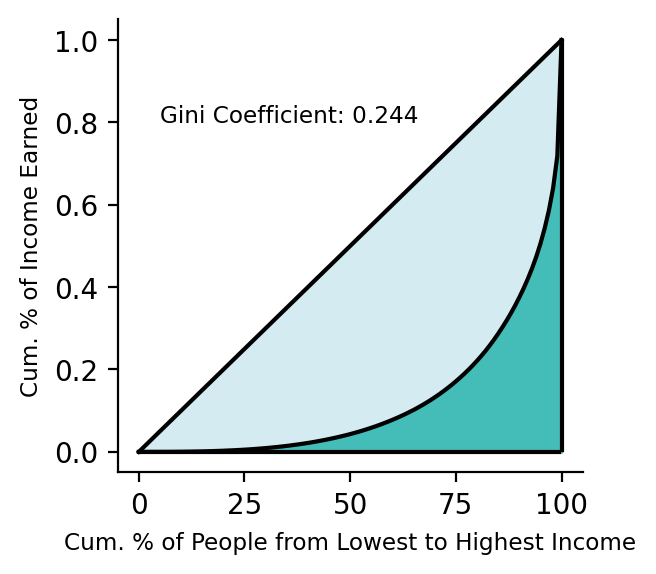

In [165]:
utils.plot_lorenz_curve(wealth)

## Is there a correlation between initial wealth and final wealth/degree?

Not really. Just final wealth and final degree.

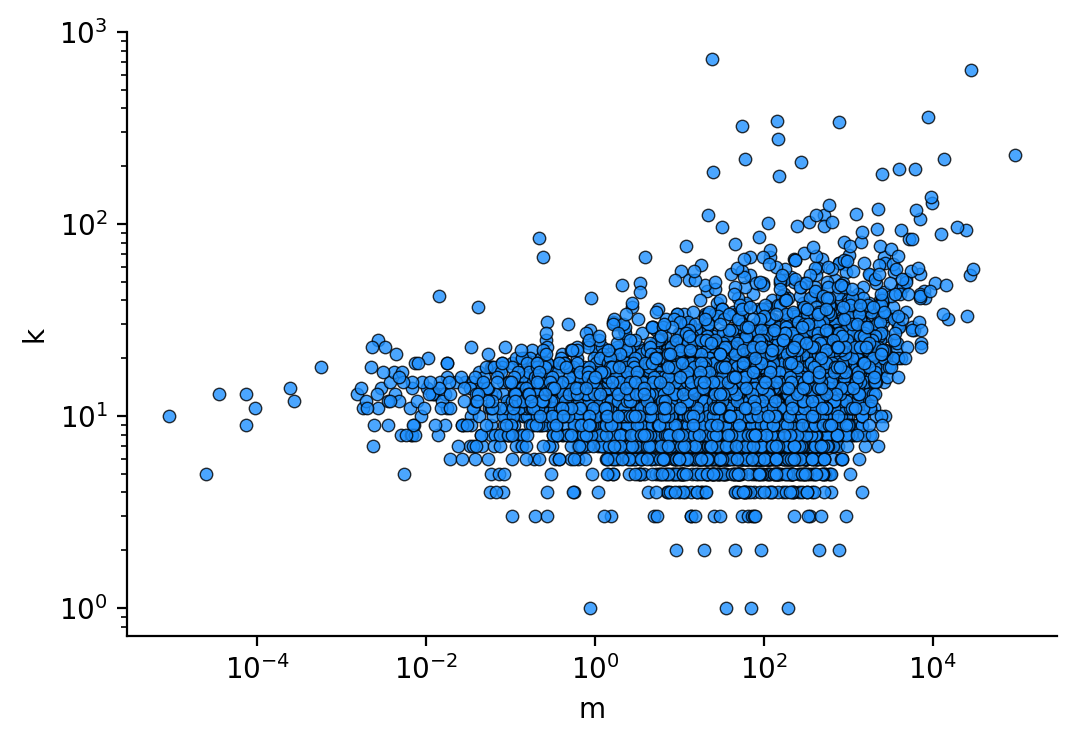

In [166]:
G = model.get_network()
degree = [G.degree(i) for i in range(N)]

plt.figure(dpi=200)
plt.scatter(model.get_all_wealth(), degree, color='dodgerblue', edgecolors='black', linewidths=0.5, s=20, marker='o', alpha=0.8)
plt.loglog()
plt.xlabel('m')
plt.ylabel('k')
sns.despine(top=True, right=True)
#plt.scatter(w0,model.get_all_wealth())
#plt.scatter(w0,degree)